<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P8_01_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle *Spaceship Titanic*

https://www.kaggle.com/competitions/spaceship-titanic/data

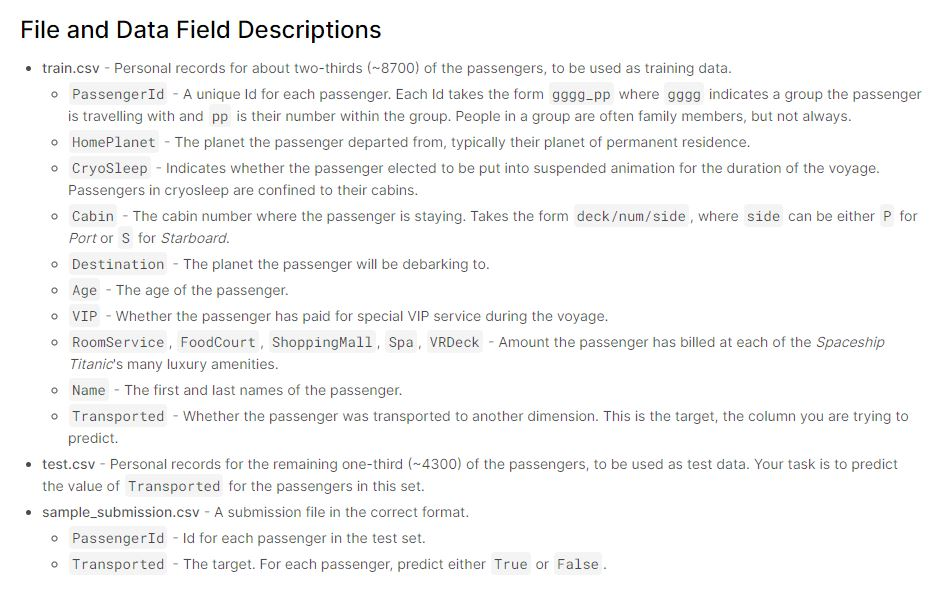

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 8

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 8


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 

import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import functions
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import adjusted_rand_score



from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV

from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importation des données

In [ ]:
df_train = pad.read_csv('train.csv')
df_test = pad.read_csv('test.csv')

# Exploration rapide des données

In [ ]:
print("Constitution de la df train : " + str(df_train.shape))
print("Constitution de la df test : " + str(df_test.shape))

Constitution de la df train : (8693, 14)
Constitution de la df test : (4277, 13)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black", sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow"] 
sns.set_palette(custom_palette) 
color = sns.color_palette()

In [ ]:
categorical_features = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "Name", "Transported", "VIP"]
quantitative_features = df_train.drop(categorical_features, axis = 1).columns.tolist()

In [ ]:
df_categorical_features = df_train[["HomePlanet", "CryoSleep", "Cabin", "Destination", "Name", "Transported", "VIP"]]
df_quantitative_features = df_train.drop(categorical_features, axis = 1)

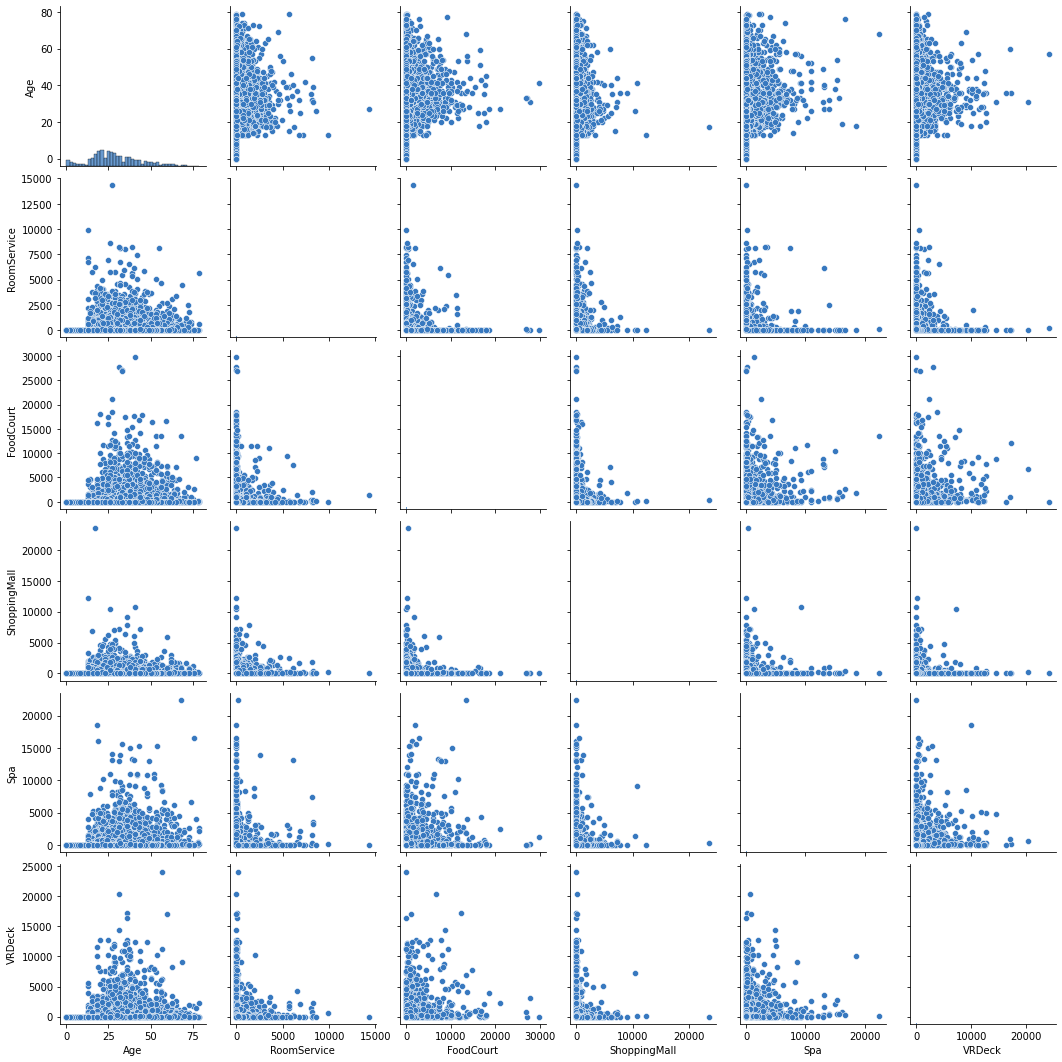

In [ ]:
sns.pairplot(df_quantitative_features)

## Nettoyage des données

In [ ]:
quantitative_features

['PassengerId',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

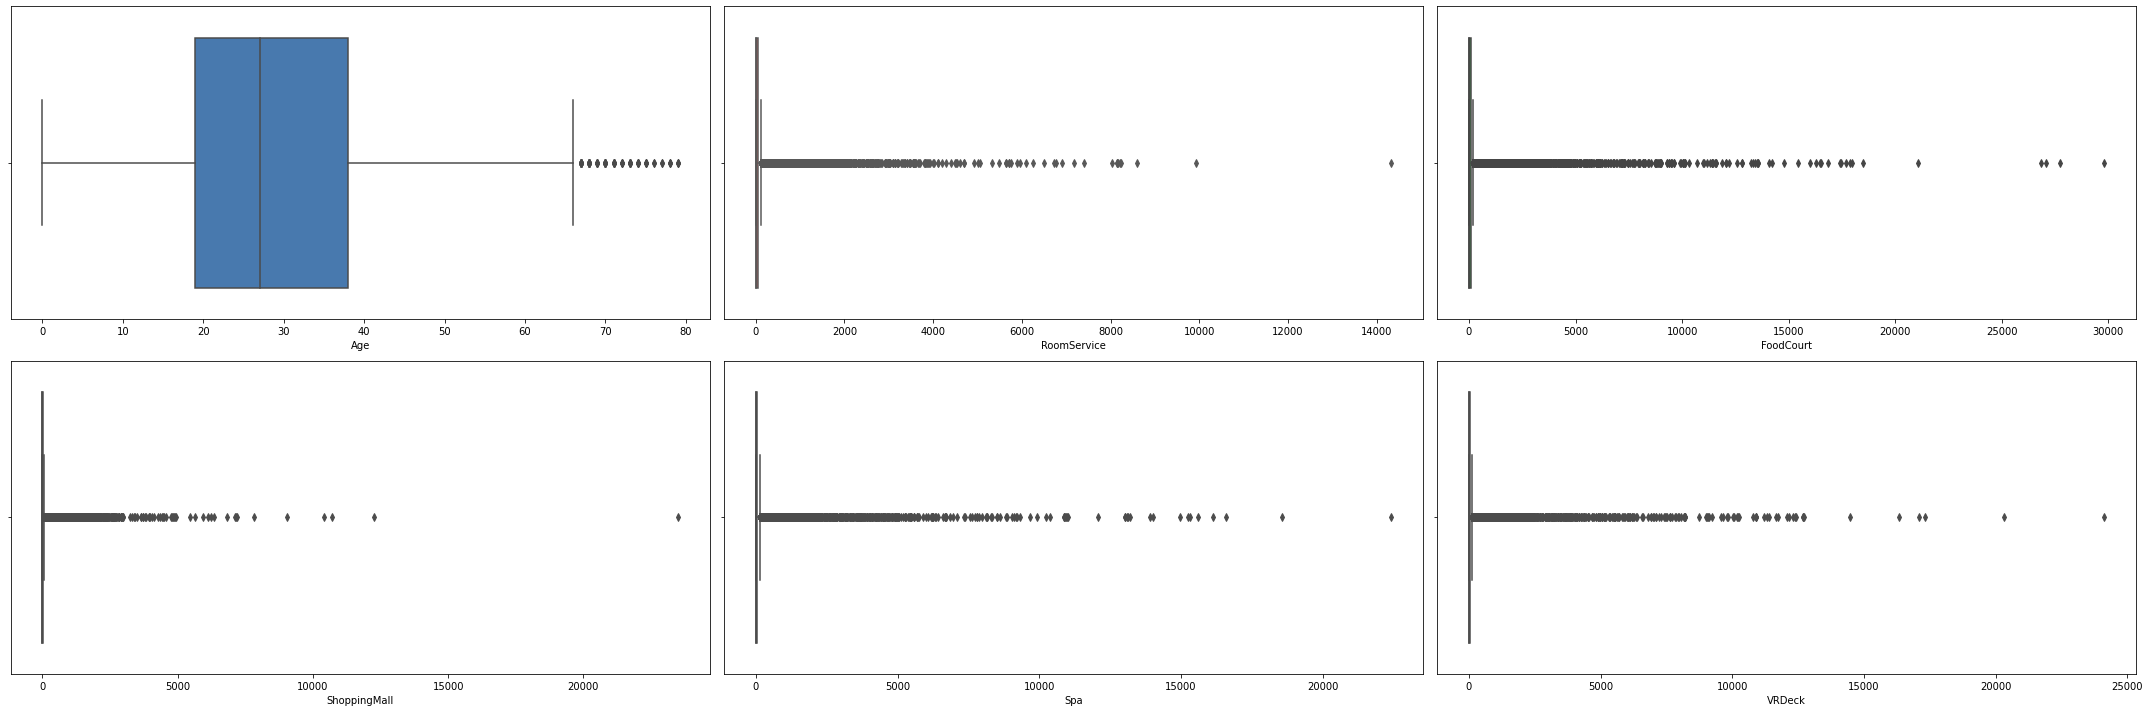

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))


sns.boxplot(data=df_train, x="Age", ax=axs[0, 0], color = custom_palette[0])
sns.boxplot(data=df_train, x="RoomService", ax=axs[0, 1], color = custom_palette[1])
sns.boxplot(data=df_train, x="FoodCourt", ax=axs[0, 2], color = custom_palette[2])
sns.boxplot(data=df_train, x="ShoppingMall", ax=axs[1, 0], color = custom_palette[3])
sns.boxplot(data=df_train, x="Spa", ax=axs[1, 1], color = custom_palette[4])
sns.boxplot(data=df_train, x="VRDeck", ax=axs[1, 2], color = custom_palette[4])

plt.tight_layout()
#fig.savefig("Global_exploration_quantitative_variables_boxplot", dpi=400)
plt.show()

In [ ]:
df_quantitative_features.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df_train[df_quantitative_features["RoomService"] == 14327]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False


Il a beaucoup abusé du roomservice celui-là, est-ce possible ? vous avez une idée ? J'aurais bien envie de l'enlever

In [ ]:
df_train[df_quantitative_features["FoodCourt"] == 29813]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2067,2215_01,Europa,False,A/27/S,55 Cancri e,41.0,True,0.0,29813.0,0.0,1257.0,6.0,Pulchib Quidedbolt,True


Il a beaucoup mangé celui-là, est-ce possible ? vous avez une idée ? J'aurais bien envie de l'enlever

In [ ]:
df_train[df_quantitative_features["ShoppingMall"] == 23492]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8415,8989_01,Europa,False,B/291/P,TRAPPIST-1e,17.0,False,0.0,366.0,23492.0,356.0,3.0,NaN,True


Histogramme de distribution pour voir notamment si besoin de normalisation (log ?)

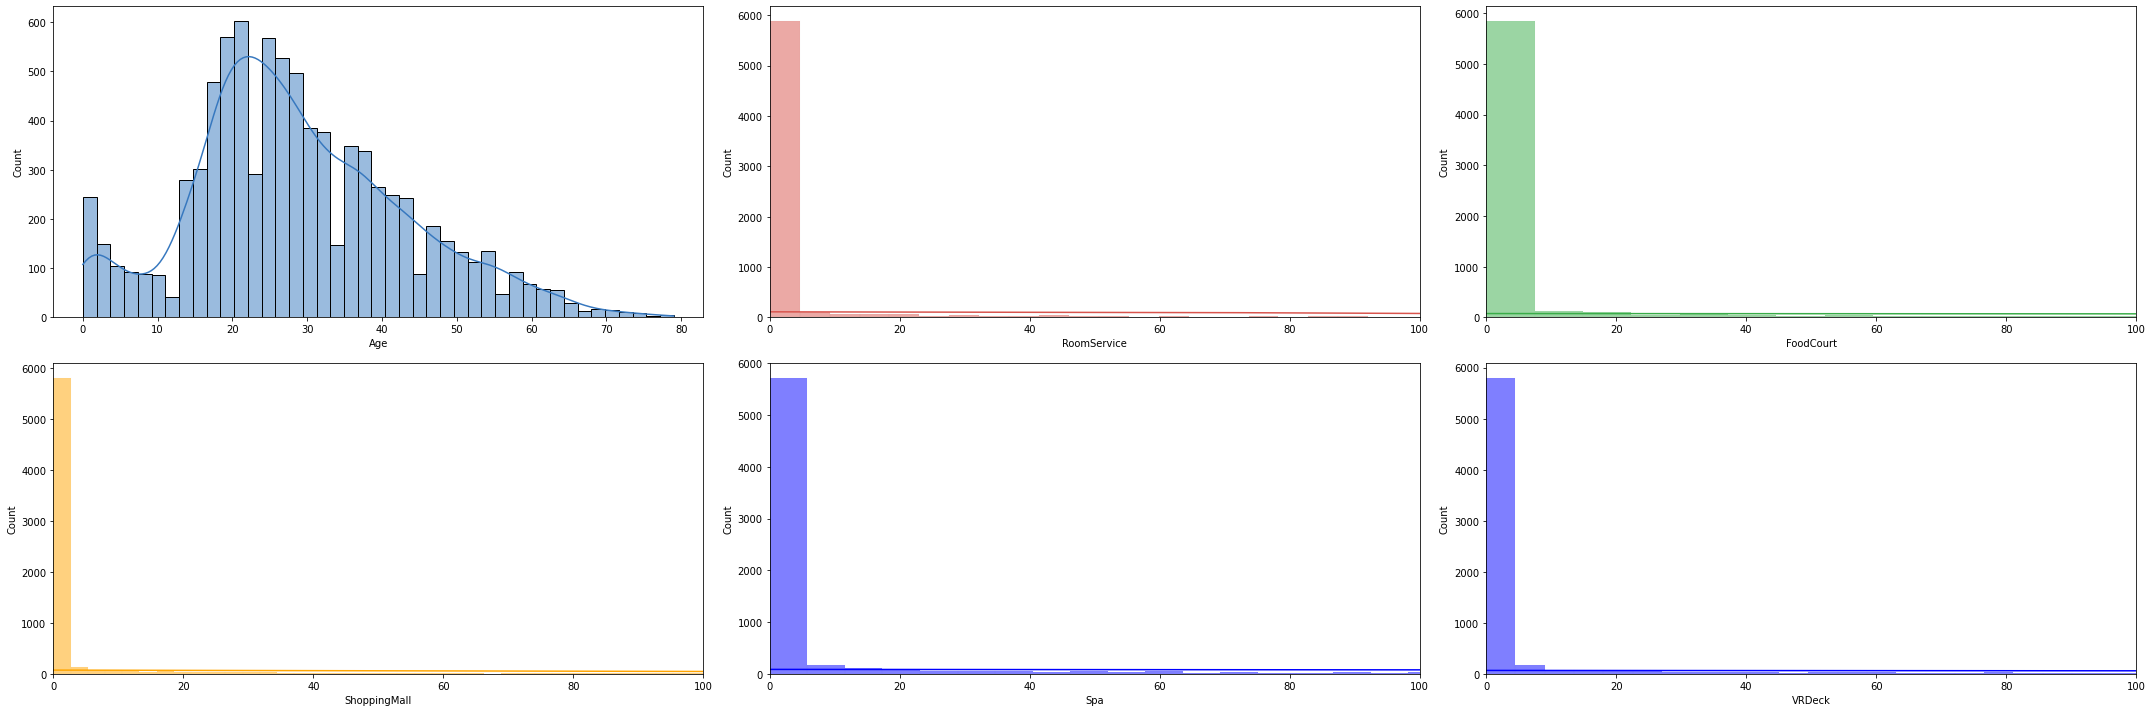

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))


sns.histplot(data=df_train, x="Age", kde=True,ax=axs[0, 0], color = custom_palette[0])
sns.histplot(data=df_train, x="RoomService", kde=True,ax=axs[0, 1], color = custom_palette[1]).set_xlim(0,100)
sns.histplot(data=df_train, x="FoodCourt", kde=True,ax=axs[0, 2], color = custom_palette[2]).set_xlim(0,100)
sns.histplot(data=df_train, x="ShoppingMall",kde=True, ax=axs[1, 0], color = custom_palette[3]).set_xlim(0,100)
sns.histplot(data=df_train, x="Spa", kde=True,ax=axs[1, 1], color = custom_palette[4]).set_xlim(0,100)
sns.histplot(data=df_train, x="VRDeck", kde=True,ax=axs[1, 2], color = custom_palette[4]).set_xlim(0,100)

plt.tight_layout()
fig.savefig("Global_exploration_quantitative_variables_histplot", dpi=400)
plt.show()

Il y a énormement de personne en cryosleep qui n'ont rien consommé d'où l'écrasement de l'histo sur 0

# Feature engineering

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


L'info *cabin* renferme l'information de l'étage, du n° de cabin et du côté du vaisseau, on peut imaginer que la première info et la dernière soit discriminant sur le succès de transport ou non des passagers, je propose donc de créer une variable *deck* et une variable *side*

In [ ]:
def get_side(df):
    side = df[-1:]
    return side

In [ ]:
df_train["Side"] = df_train["Cabin"].dropna().apply(get_side)

In [ ]:
def get_deck(df):
    deck = df[:1]
    return deck

In [ ]:
df_train["Deck"] = df_train["Cabin"].dropna().apply(get_deck)

Si le n° de cabin correspond à l'avant ou l'arrière du vaisseau, ce n° peut aussi être important pour la survie, je vais donc l'extraire

In [ ]:
def get_cabin_number(df):
    cab_num = df[2:-2]
    return cab_num

In [ ]:
df_train["Cabin_number"] = df_train["Cabin"].dropna().apply(get_cabin_number)

In [ ]:
df_train["Cabin_number"] = df_train["Cabin_number"].astype('float64')

In [ ]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,Deck,Cabin_number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,B,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,F,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,A,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,A,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,P,A,98.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,S,G,1499.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,S,G,1500.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,S,E,608.0


La colonne Cabin n'est donc plus importante pour le modèle, je la supprime

In [ ]:
df_train = df_train.drop("Cabin", axis = 1)

La variable *name* ne devrait pas changer grand chose logiquement, on éjecte du modèle

In [ ]:
df_train = df_train.drop("Name", axis = 1)

Je ne suis pas sûr que les variables des dépenses soient réellement importantes pour la prédiction de survie mais je vais créer une variable dépense totale qui sera peut être plus utile que 5 variables très corrélées entre elles

In [ ]:
df_train["Dépense_totale"] = df_train["RoomService"] + df_train["FoodCourt"] + df_train["ShoppingMall"] + df_train["Spa"] + df_train["VRDeck"]

J'applique la même chose pour la df test

In [ ]:
df_test["Side"] = df_test["Cabin"].dropna().apply(get_side)
df_test["Deck"] = df_test["Cabin"].dropna().apply(get_deck)
df_test["Cabin_number"] = df_test["Cabin"].dropna().apply(get_cabin_number)
df_test = df_test.drop("Cabin", axis = 1)
df_test = df_test.drop("Name", axis = 1)
df_test["Dépense_totale"] = df_test["RoomService"] + df_test["FoodCourt"] + df_test["ShoppingMall"] + df_test["Spa"] + df_test["VRDeck"]

# Analyse uni et multivariée pour comprendre le comportement des variables

In [ ]:
df_train = df_train.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')

In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0


In [ ]:
df_train.dropna()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0


In [ ]:
df_train.isna().sum() 

HomePlanet        201
CryoSleep         217
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Transported         0
Side              199
Deck              199
Cabin_number      199
Dépense_totale    908
dtype: int64

Il y a beaucoup de NaN et les supprimer revient à supprimer 2000 lignes soit 25% du dataset, il va surement falloir faire du cas par cas (colonnes)

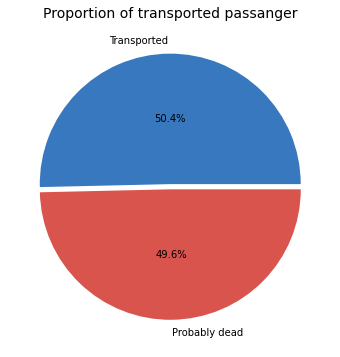

In [ ]:
data = df_train['Transported'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("Transported", "Probably dead")
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Proportion of transported passanger", fontsize=14);
pie.savefig("Proportion of transported passanger.png")

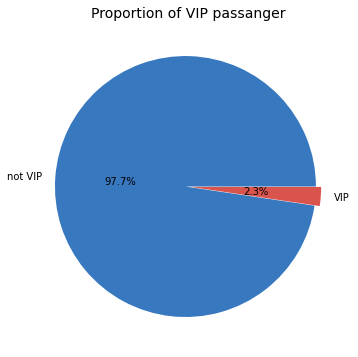

In [ ]:
data = df_train['VIP'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("not VIP", "VIP")
plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Proportion of VIP passanger", fontsize=14);
pie.savefig("Proportion of VIP passanger.png")

Il y a t-il un impact VIP or not VIP sur la survie

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

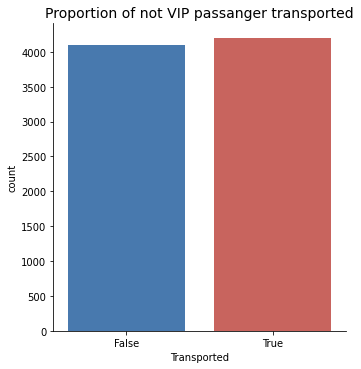

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['VIP']== False], kind='count')
plt.title("Proportion of not VIP passanger transported", fontsize=14);
#ax.savefig("Proportion of not VIP passanger transported", dpi=400)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

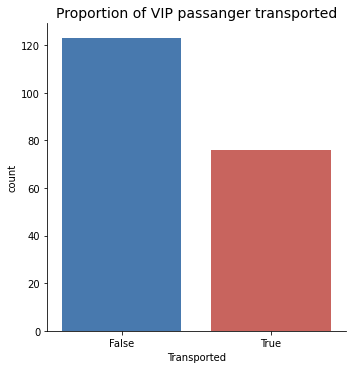

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['VIP']== True], kind='count')
plt.title("Proportion of VIP passanger transported", fontsize=14);
#ax.savefig("Proportion of VIP passanger transported", dpi=400)

La variable VIP ne va sûrement pas jouer un rôle important dans notre modélisation

In [ ]:
categorical_features = ["HomePlanet", "CryoSleep", "Destination", "Transported", "VIP", "Deck", "Side"]
quantitative_features = df_train.drop(categorical_features, axis = 1).columns.tolist()
df_categorical_features = df_train[["HomePlanet", "CryoSleep", "Destination", "Transported", "VIP", "Deck", "Side"]]
df_quantitative_features = df_train.drop(categorical_features, axis = 1).dropna()

In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0


Fonction permettant de tester la différence entre deux groupes

In [ ]:
for elm in df_quantitative_features:
	result_shapiro = stats.shapiro(df_quantitative_features[elm])
	if result_shapiro[1]< 0.05:
		print(f"La variable {str(elm)} suit une loi normale (p = {str(result_shapiro[1])} )")
	if result_shapiro[1]> 0.05:
		print(f"La variable {str(elm)} ne suit pas une loi normale (p = {str(result_shapiro[1])} )")

La variable Age suit une loi normale (p = 1.968017344124077e-30 )
La variable RoomService suit une loi normale (p = 0.0 )
La variable FoodCourt suit une loi normale (p = 0.0 )
La variable ShoppingMall suit une loi normale (p = 0.0 )
La variable Spa suit une loi normale (p = 0.0 )
La variable VRDeck suit une loi normale (p = 0.0 )
La variable Cabin_number suit une loi normale (p = 0.0 )
La variable Dépense_totale suit une loi normale (p = 0.0 )


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Les variables quantitatives suivent une loi normale

In [ ]:
def StudentTestSigni(df1,df2):
	"""Fonction permettant un test statistique classique (t test de student)"""
	student_test = ttest_ind(df1, df2)
	if student_test[1]< 0.05:
		print("Les valeurs sont significativement différentes (p = " + str(student_test[1]) + ")")
	elif student_test[1]> 0.05:
		print("Les valeurs ne sont pas significativement différentes (p = " + str(student_test[1]) + ")")

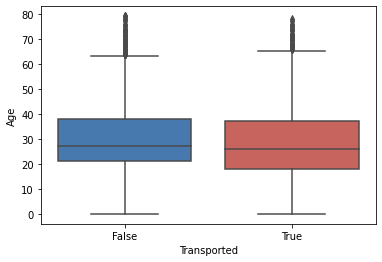

In [ ]:
ax = sns.boxplot(x=df_train['Transported'], y=df_train["Age"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_age_transported", dpi=400)

In [ ]:
StudentTestSigni(df_train[df_train['Transported'] == False]["Age"].dropna(), df_train[df_train['Transported'] == True]["Age"].dropna())

Les valeurs sont significativement différentes (p = 4.165050977554493e-12)


In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,S,G,1500.0,1873.0


Vaut-il mieux être en train de dormir en cryoconcervation pour survivre à une tempête galactique ou non ?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

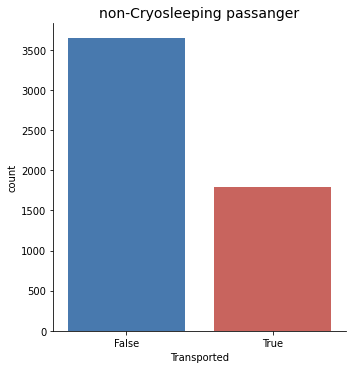

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['CryoSleep']== False], kind='count')
plt.title("non-Cryosleeping passanger", fontsize=14);
ax.savefig("Proportion of non-Cryosleeping passanger transported", dpi=400)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

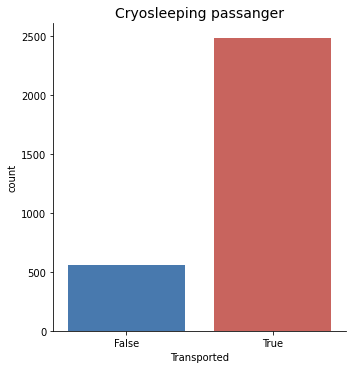

In [ ]:
fig = plt.figure()
ax = sns.factorplot('Transported', data=df_train[df_train['CryoSleep']== True], kind='count')
plt.title("Cryosleeping passanger", fontsize=14);
ax.savefig("Proportion of Cryosleeping passanger transported", dpi=400)

L'état (cryosleeping or not) est une variable intéressante pour notre modèle

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


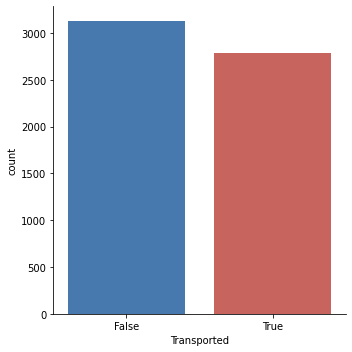

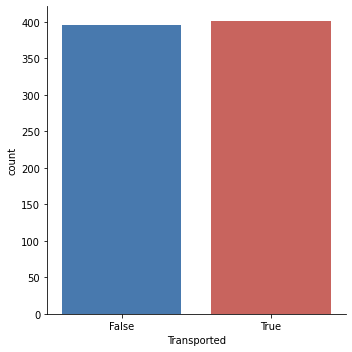

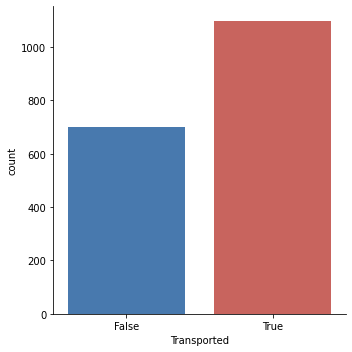

In [ ]:
sns.catplot('Transported', data=df_train[df_train['Destination']== "TRAPPIST-1e"], kind='count')
sns.catplot('Transported', data=df_train[df_train['Destination']== "PSO J318.5-22"], kind='count')
sns.catplot('Transported', data=df_train[df_train['Destination']== "55 Cancri e"], kind='count')
plt.tight_layout()
plt.show()

Les passagers pour *55 Cancri e* semblent avoir été plus chanceux, pn peut garder cette variable qui semble avoir un impact

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


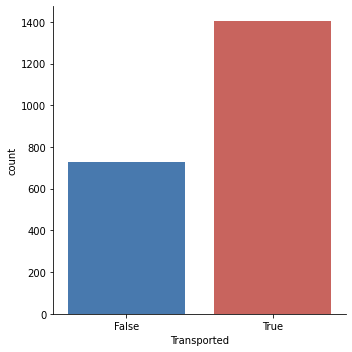

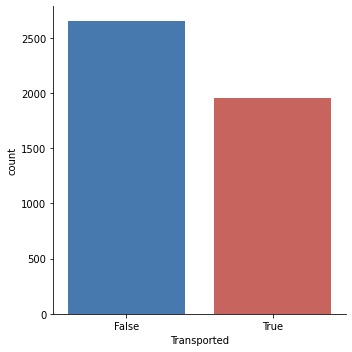

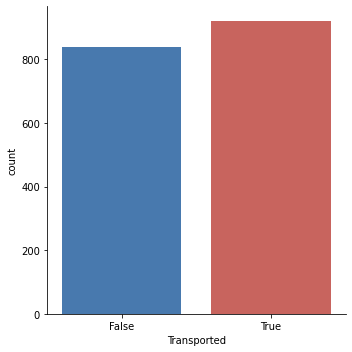

In [ ]:
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Europa"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Earth"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Mars"], kind='count')
plt.tight_layout()
plt.show()

Il semble y avoir un impact de la planète d'origine, on garde cette variable pour le modèle

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


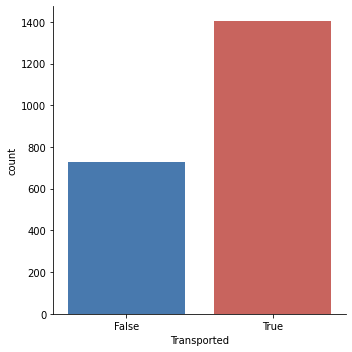

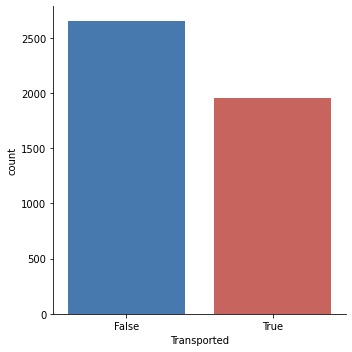

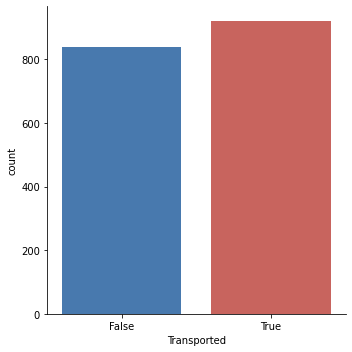

In [ ]:
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Europa"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Earth"], kind='count')
sns.catplot('Transported', data=df_train[df_train['HomePlanet']== "Mars"], kind='count')
plt.tight_layout()
plt.show()

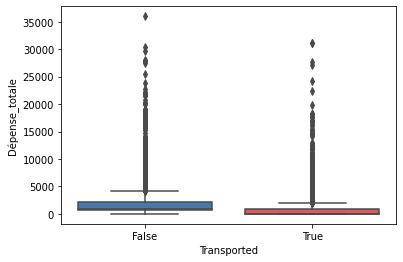

In [ ]:
ax = sns.boxplot(x=df_train['Transported'], y=df_train["Dépense_totale"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_montant_transported", dpi=400)

In [ ]:
StudentTestSigni(df_train[df_train['Transported'] == False]["Dépense_totale"].dropna(), df_train[df_train['Transported'] == True]["Dépense_totale"].dropna())

Les valeurs sont significativement différentes (p = 1.9831447030796394e-69)


Il y a un impact du montant dépensé, on garde la variable

Corrélation entre variables

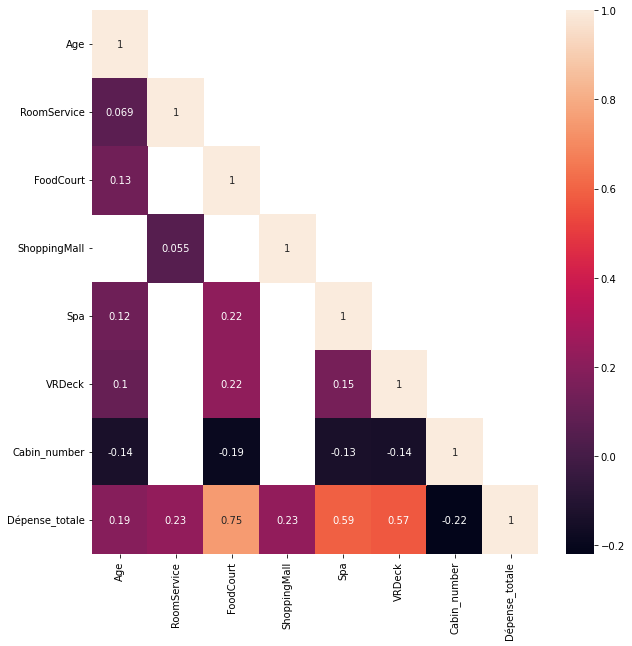

In [ ]:
def corr_sig(df=None):
	p_matrix = np.zeros(shape=(df_quantitative_features.shape[1],df_quantitative_features.shape[1]))
	for col in df_quantitative_features.columns:
		for col2 in df_quantitative_features.drop(col,axis=1).columns:
			_ , p = stats.pearsonr(df_quantitative_features[col],df_quantitative_features[col2])
			p_matrix[df_quantitative_features.columns.to_list().index(col),df_quantitative_features.columns.to_list().index(col2)] = p
	return p_matrix

p_values = corr_sig(df_quantitative_features)                     # get p-Value
mask = np.invert(np.tril(p_values<0.001))    # mask - only get significant corr

plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_quantitative_features.corr(), mask=mask, annot=True)
figure_pvalue= ax.get_figure()
#figure_pvalue.savefig("heatmap_quantitative_variables_pvalue", dpi=400)

Avec la sélection par p<0.05

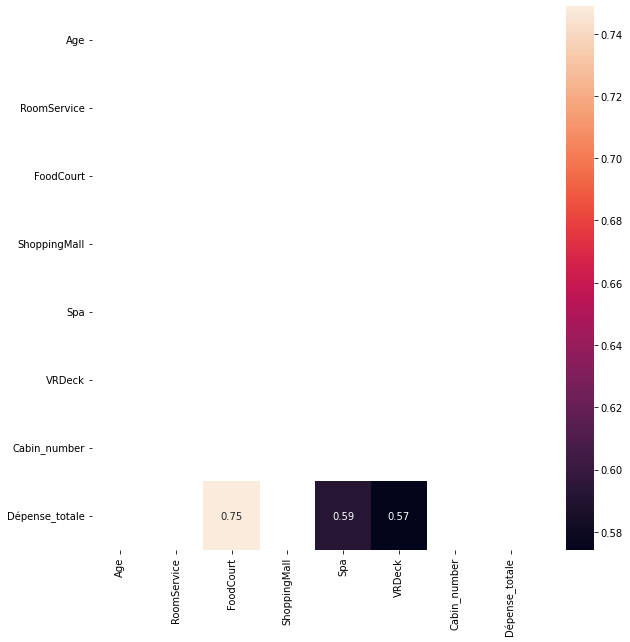

In [ ]:
def corr_corr(df=None):
	corr = np.zeros(shape=(df_quantitative_features.shape[1],df_quantitative_features.shape[1]))
	for col in df_quantitative_features.columns:
		for col2 in df_quantitative_features.drop(col,axis=1).columns:
			c , p = stats.pearsonr(df_quantitative_features[col],df_quantitative_features[col2])
			corr[df_quantitative_features.columns.to_list().index(col),df_quantitative_features.columns.to_list().index(col2)] = c
	return corr


def corr_pvalue(df=None):
	p_matrix = np.zeros(shape=(df_quantitative_features.shape[1],df_quantitative_features.shape[1]))
	for col in df_quantitative_features.columns:
		for col2 in df_quantitative_features.drop(col,axis=1).columns:
			c , p = stats.pearsonr(df_quantitative_features[col],df_quantitative_features[col2])
			p_matrix[df_quantitative_features.columns.to_list().index(col),df_quantitative_features.columns.to_list().index(col2)] = p
	return p_matrix


p_values = corr_pvalue(df_quantitative_features)                   # get p-values
corr = corr_corr(df_quantitative_features)                     # get R values
maskP = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
maskR = np.invert(np.tril(corr>0.45))
mask = maskP + maskR

plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_quantitative_features.corr(), mask=mask, annot=True)
figure_pvalue_corr = ax.get_figure()
#figure_pvalue_corr.savefig("heatmap_quantitative_variables_pvalue_corr", dpi=400)

Il n'y a qu'entre les variables de dépense qu'il existe une corrélation, ce qui est assez logique, je supprime donc les variables de dépense pour ne garder que la somme totale

In [ ]:
list_to_drop = ["FoodCourt", "Spa", "ShoppingMall", "RoomService", "VRDeck"]
df_train = df_train.drop(list_to_drop, axis = 1)
df_test = df_test.drop(list_to_drop, axis = 1)

In [ ]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,P,B,0.0,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,S,F,0.0,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,S,A,0.0,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,S,A,0.0,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,S,F,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,False,P,A,98.0,8536.0
9278_01,Earth,True,PSO J318.5-22,18.0,False,False,S,G,1499.0,0.0
9279_01,Earth,False,TRAPPIST-1e,26.0,False,True,S,G,1500.0,1873.0


In [ ]:
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale
PassengerId,,,,,,,,,
0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3,0.0
0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4,2832.0
0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0,0.0
0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1,7418.0
0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5,645.0
...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,S,G,1496,0.0
9269_01,Earth,False,TRAPPIST-1e,42.0,False,NaN,NaN,NaN,1018.0
9271_01,Mars,True,55 Cancri e,NaN,False,P,D,296,0.0


In [ ]:
df_train.to_csv('data_projet8_TRAIN_clean.csv', index=True)

In [ ]:
df_test.to_csv('data_projet8_TEST_clean.csv', index=True)

# Préparation des données

In [ ]:
df_train_mod = pad.read_csv('data_projet8_TRAIN_clean.csv')
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
df_train_mod = df_train_mod.dropna()

In [ ]:
features_Qual = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Side', 'Deck']
features_Quant = ['Age', 'Cabin_number', 'Dépense_totale']

Préparation des données quantitatives (standardisation) et catégorielles (encodage)

In [ ]:
oneHotEncoder_fit = OneHotEncoder(sparse=False).fit(df_train_mod[features_Qual])
df_features_Qual = oneHotEncoder_fit.fit_transform(df_train_mod[features_Qual])

In [ ]:
oneHotEncoder_fit.get_feature_names().tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_Earth',
 'x0_Europa',
 'x0_Mars',
 'x1_False',
 'x1_True',
 'x2_55 Cancri e',
 'x2_PSO J318.5-22',
 'x2_TRAPPIST-1e',
 'x3_False',
 'x3_True',
 'x4_P',
 'x4_S',
 'x5_A',
 'x5_B',
 'x5_C',
 'x5_D',
 'x5_E',
 'x5_F',
 'x5_G',
 'x5_T']

In [ ]:
df_features_Quant = StandardScaler().fit_transform(df_train_mod[features_Quant])
df_features_Quant_norm = pad.DataFrame(columns = df_train_mod[features_Quant].columns, data = df_features_Quant).set_index(df_train_mod.index)

Création de la database

In [ ]:
df_train_norm = pad.merge(df_features_Quant_norm, pad.DataFrame(columns = oneHotEncoder_fit.get_feature_names().tolist(), data = oneHotEncoder_fit.fit_transform(df_train_mod[features_Qual])).set_index(df_train_mod.index), left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_train_norm

In [ ]:
X = df_train_norm
y = df_train_mod["Transported"]

In [ ]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 7)

# Segmentation des passagers - modélisation

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Fonction pour entrainer le modèle et évaluer les performances

In [ ]:
def run_model_and_performance_check(model):

    # Choix du model et entrainement
    model_regr = model
    model_regr.fit(X_train, y_train)

    # Prédiction du modèle et archivage des résultats
    y_pred = model_regr.predict(X_test)

    # Création des dataframes résultats
    results_regression = np.array([model_regr.score(X_train,y_train), model_regr.score(X_test,y_test)])
    df_results = pad.DataFrame(index = ["Score entrainement", "Score de prédiction"], columns = [str(model)[:-2]])
    df_results[str(model)[:-2]] = results_regression

    return df_results

Test d'un Linear et Ridge classifier pour voir les performances de base

In [ ]:
run_model_and_performance_check(LinearDiscriminantAnalysis())

,LinearDiscriminantAnalysis
Score entrainement,0.728366
Score de prédiction,0.734477


In [ ]:
run_model_and_performance_check(RidgeClassifier())

,RidgeClassifier
Score entrainement,0.727972
Score de prédiction,0.733885


Evaluation des meilleurs hyperparamètres pour chaque modèle par gridsearch et validation croisée

### KNeighbors Classifier hyperparameters tuning

In [ ]:
KNeighborsClassifier_parameters = {'leaf_size':list(range(1,50)), 'n_neighbors':list(range(1,30)), 'p':[1,2]}
KNeighborsClassifier_GridSearchCV = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = KNeighborsClassifier_parameters, cv = 5, n_jobs=-1)
KNeighborsClassifier_GridSearchCV.fit(X_train, y_train)
KNeighborsClassifier_GridSearchCV.best_params_
print("KNeighborsClassifier best param = " + str(KNeighborsClassifier_GridSearchCV.best_params_))

Lasso best param = {'leaf_size': 1, 'n_neighbors': 23, 'p': 2}


### GaussianNB Classifier hyperparameters tuning

In [ ]:
GaussianNB_parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
GaussianNB_GridSearchCV = GridSearchCV(estimator = GaussianNB(), param_grid = GaussianNB_parameters, cv = 5, n_jobs=-1)
GaussianNB_GridSearchCV.fit(X_train, y_train)
GaussianNB_GridSearchCV.best_params_
print("GaussianNB best param = " +str(GaussianNB_GridSearchCV.best_params_))

GaussianNB best param = {'var_smoothing': 1.0}


### DecisionTree Classifier hyperparameters tuning

In [ ]:
DecisionTreeClassifier_parameters = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}
DecisionTreeClassifier_GridSearchCV = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = DecisionTreeClassifier_parameters, cv = 5, n_jobs=-1)
DecisionTreeClassifier_GridSearchCV.fit(X_train, y_train)
DecisionTreeClassifier_GridSearchCV.best_params_
print("DecisionTreeClassifier best param = " +str(DecisionTreeClassifier_GridSearchCV.best_params_))

DecisionTreeClassifier best param = {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100}


### SVM Classifier hyperparameters tuning

In [ ]:
SVC_parameters = {'C': [0.1,1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'poly']}
SVC_GridSearchCV = GridSearchCV(estimator = SVC(), param_grid = SVC_parameters, n_jobs=-1)
SVC_GridSearchCV.fit(X_train, y_train)
SVC_GridSearchCV.best_params_
print("SVC best param = " +str(SVC_GridSearchCV.best_params_))

SVC best param = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
List_of_models = [LinearDiscriminantAnalysis(), RidgeClassifier(), KNeighborsClassifier(leaf_size = 1, n_neighbors = 23, p= 2), GaussianNB(var_smoothing = 1), DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 100), SVC(C= 1, kernel= 'rbf')]
List_of_models_for_graph = ["LinearDiscriminant", "Ridge", "KNeighbors", "GaussianNB", "DecisionTree", "SVC"]

In [ ]:
df_results = pad.DataFrame(index = ["Score entrainement", "Score de prédiction"])

In [ ]:
for i in range(len(List_of_models)):
  model_regr = List_of_models[i] 
  model_regr.fit(X_train, y_train)
  y_pred = model_regr.predict(X_test)
  results_classification = np.array([model_regr.score(X_train,y_train), model_regr.score(X_test,y_test)])
  df_results[List_of_models_for_graph[i]] = results_classification

In [ ]:
df_results

,LinearDiscriminant,Ridge,KNeighbors,GaussianNB,DecisionTree,SVC
Score entrainement,0.728366,0.727972,0.769170,0.72876,0.753795,0.754977
Score de prédiction,0.734477,0.733885,0.752218,0.74039,0.754583,0.756357


In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

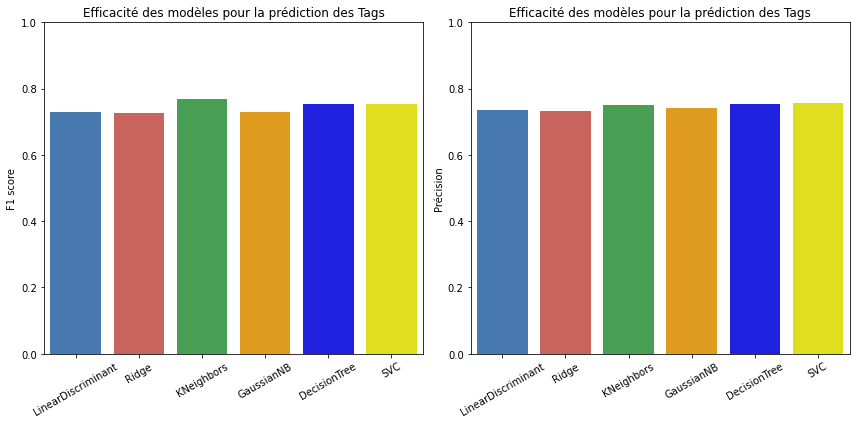

In [ ]:
df_graph = df_results.transpose()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1 = sns.barplot(x=df_graph.index, y=df_graph["Score entrainement"].values, data=df_graph, ax=axs[0], palette = custom_palette)
ax2 = sns.barplot(x=df_graph.index, y=df_graph["Score de prédiction"].values, data=df_graph, ax=axs[1], palette = custom_palette)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax1.set_title('Efficacité des modèles pour la prédiction des Tags')
ax1.set_ylabel('F1 score')
ax1.set(ylim=(0, 1))
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
ax2.set_title('Efficacité des modèles pour la prédiction des Tags')
ax2.set_ylabel('Précision')
ax2.set(ylim=(0, 1))

plt.tight_layout()
fig.savefig("Performance modèles classification", dpi=400)

Le modèle KNeighbors à l'air d'être le mieux, je le sauvegarde

In [ ]:
from joblib import dump, load

In [ ]:
#Sauvegarde du modèle optimisé
model_class_KN = KNeighborsClassifier(leaf_size = 1, n_neighbors = 23, p= 2)
model_class_KN.fit(X_train, y_train)
dump(model_class_KN, 'KNeighborsClassifier_model.joblib')

['KNeighborsClassifier_model.joblib']

## Représentation

### Decision plot

Tu saurais faire ça Ilyass ? moi ça ne marche pas ...
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [ ]:
from mlxtend.plotting import plot_decision_regions

svm = SVC(C= 1, kernel= 'rbf')
svm.fit(X_train, y_train)

# Plotting decision regions
plot_decision_regions(X_train.values, y_train_bin, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris_linear')
plt.show()

In [ ]:
# Initializing Classifiers
clf1 = List_of_models[0]
clf2 = List_of_models[1]
clf3 = List_of_models[2]
clf4 = List_of_models[3]

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Représentation T-SNE

In [ ]:
tsne = TSNE(n_components=2, perplexity = 30)
T = tsne.fit_transform(X.copy())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


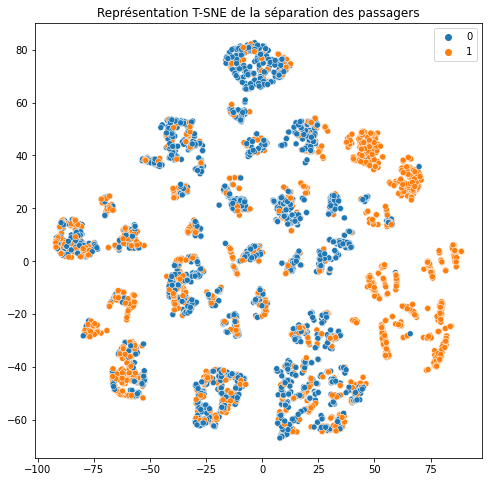

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation des passagers')
ax = sns.scatterplot(T[:,0], T[:,1], hue=y, legend='full')
fig = ax.get_figure()
fig.savefig("T-SNE", dpi=400)

Matrice de confusion (à tester)

In [ ]:
#code Cyril à tester
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Prédiction du dataset ***estimation*** du Kaggle

### Préparation des données du fichier test

In [ ]:
df_test_mod = pad.read_csv('data_projet8_TEST_clean.csv')

In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0
...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,S,G,1496.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,NaN,NaN,NaN,1018.0
4274,9271_01,Mars,True,55 Cancri e,NaN,False,P,D,296.0,0.0
4275,9273_01,Europa,False,NaN,NaN,False,P,D,297.0,3203.0


In [ ]:
df_test_mod = df_test_mod.dropna()

Préparation des données quantitatives (standardisation) et catégorielles (encodage)

In [ ]:
oneHotEncoder_fit = OneHotEncoder(sparse=False).fit(df_test_mod[features_Qual])
df_features_Qual = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])

In [ ]:
oneHotEncoder_fit.get_feature_names().tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_Earth',
 'x0_Europa',
 'x0_Mars',
 'x1_False',
 'x1_True',
 'x2_55 Cancri e',
 'x2_PSO J318.5-22',
 'x2_TRAPPIST-1e',
 'x3_False',
 'x3_True',
 'x4_P',
 'x4_S',
 'x5_A',
 'x5_B',
 'x5_C',
 'x5_D',
 'x5_E',
 'x5_F',
 'x5_G',
 'x5_T']

In [ ]:
df_features_Quant = StandardScaler().fit_transform(df_test_mod[features_Quant])
df_features_Quant_norm = pad.DataFrame(columns = df_test_mod[features_Quant].columns, data = df_features_Quant).set_index(df_test_mod.index)

In [ ]:
df_test_norm = pad.merge(df_features_Quant_norm, pad.DataFrame(columns = oneHotEncoder_fit.get_feature_names().tolist(), data = oneHotEncoder_fit.fit_transform(df_test_mod[features_Qual])).set_index(df_test_mod.index), left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Chargement du modèle optimisé
model_class_KN = load('KNeighborsClassifier_model.joblib')

In [ ]:
df_test_mod["Prediction_Transported"] = model_class_KN.predict(df_test_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test_mod

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Side,Deck,Cabin_number,Dépense_totale,Prediction_Transported
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,S,G,3.0,0.0,True
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,S,F,4.0,2832.0,False
2,0019_01,Europa,True,55 Cancri e,31.0,False,S,C,0.0,0.0,True
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,S,C,1.0,7418.0,True
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,S,F,5.0,645.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4269,9263_01,Earth,True,TRAPPIST-1e,43.0,False,S,G,1495.0,0.0,True
4270,9265_01,Mars,False,TRAPPIST-1e,43.0,False,S,D,278.0,3898.0,False
4271,9266_01,Earth,False,TRAPPIST-1e,40.0,False,S,F,1796.0,868.0,False
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,S,G,1496.0,0.0,True


In [ ]:
df_test_mod[['PassengerId' , 'Prediction_Transported']].to_csv('Projet8_prediction.csv', index=True)

In [ ]:
df_test_mod[['PassengerId' , 'Prediction_Transported']].head(20)

,PassengerId,Prediction_Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
5,0027_01,False
7,0032_01,True
8,0032_02,True
9,0033_01,False
10,0037_01,False
